#  DIABETES

## collection of the data

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [10]:
data=pd.read_csv('C:/Users/sachi/Downloads/diabetes.csv')

In [11]:
data.shape

(768, 9)

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## analyzing data

In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


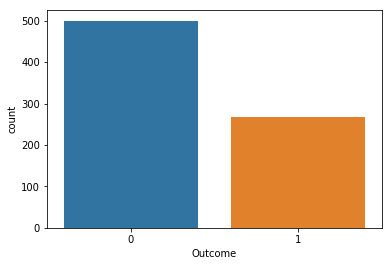

In [15]:
sns.countplot(x='Outcome',data=data)

In [16]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


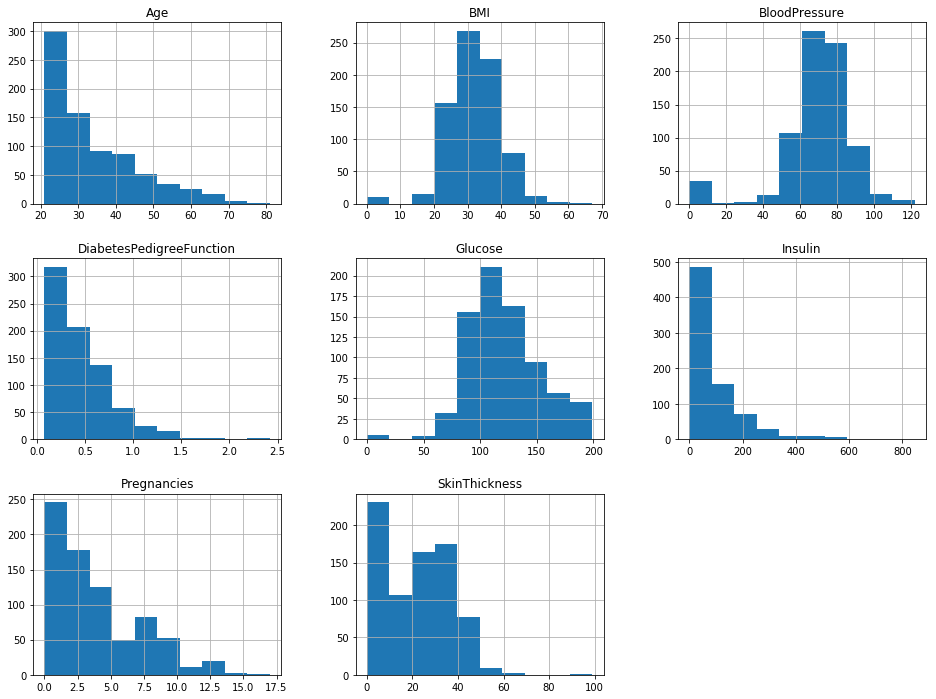

In [24]:
plt.rcParams['figure.figsize']=(16,12)
data.drop(['Outcome'],axis=1).hist();

## train and test

In [19]:
X=data.drop('Outcome',axis =1)
y=data['Outcome']


In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=66)

## 1) logisitic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_pred=model.predict(x_test)

In [63]:
model.score(x_test,y_test)

0.7748917748917749

In [64]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))

classification_report:              precision    recall  f1-score   support

          0       0.89      0.80      0.85       178
          1       0.51      0.68      0.58        53

avg / total       0.81      0.77      0.79       231

confusion_matrix: [[143  35]
 [ 17  36]]
accuracy_score: 0.7748917748917749


### 2) KNN

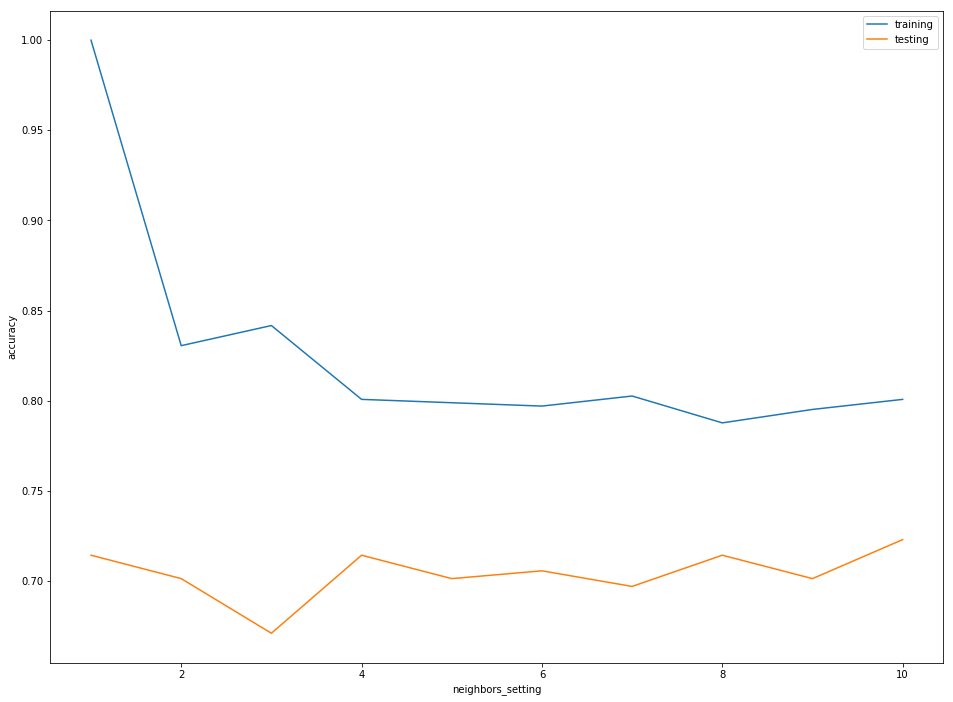

In [65]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
testing_accuracy=[]
neighbors_setting= range(1,11)
for n_neighbors in neighbors_setting:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))

plt.plot(neighbors_setting,training_accuracy,label='training')
plt.plot(neighbors_setting,testing_accuracy,label='testing')
plt.xlabel('neighbors_setting')
plt.ylabel('accuracy')
plt.legend()
plt.show()
    

In [68]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
print('training is:{:}'.format(knn.score(x_train,y_train)))
print('Testing:{:}'.format(knn.score(x_test,y_test)))

training is:0.7895716945996276
Testing:0.7186147186147186


In [67]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print('training is:{:}'.format(knn.score(x_train,y_train)))
print('Testing:{:}'.format(knn.score(x_test,y_test)))

training is:0.7951582867783985
Testing:0.7012987012987013


## 3)SVM

In [52]:
from sklearn.svm import SVC

In [56]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.7662337662337663

In [57]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))

classification_report:              precision    recall  f1-score   support

          0       0.89      0.78      0.83       169
          1       0.55      0.74      0.63        62

avg / total       0.80      0.77      0.78       231

confusion_matrix: [[131  38]
 [ 16  46]]
accuracy_score: 0.7662337662337663


### 4) Naive Bayes 

In [77]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)


0.7922077922077922

In [81]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))

classification_report:              precision    recall  f1-score   support

          0       0.88      0.83      0.85       168
          1       0.61      0.68      0.64        63

avg / total       0.80      0.79      0.80       231

confusion_matrix: [[140  28]
 [ 20  43]]
accuracy_score: 0.7922077922077922


## 5) Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.7662337662337663

In [92]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print('classification_report:',classification_report(y_pred,y_test))
print('confusion_matrix:',confusion_matrix(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))

classification_report:              precision    recall  f1-score   support

          0       0.85      0.82      0.83       166
          1       0.58      0.63      0.60        65

avg / total       0.77      0.77      0.77       231

confusion_matrix: [[136  30]
 [ 24  41]]
accuracy_score: 0.7662337662337663


### 1) logistic Regression-77.4%
###  2) KNN-71.8%
###  3) SVM-76.6%
###  4) Naive-bayes-79.2%
###  5) RandomForest-76.6%

#  According to above analysis we have found Naive-bayes as the better output as 79.2%